# Consumer Complaint Classification
Link can be found here: https://www.kaggle.com/dushyantv/consumer_complaints

* Make a Vectorizer e.g: Count Vectorizer or TfID Vectorizer
* Vectorizer.fit(X_train)
* DataFormat = Vectorizer.transform(X_train)
* CLF = LogisticRegressionCV(class_weight='balanced',max_iter=10000, verbose=1).fit(DataFormat, Y_train)
* X_test = vectorizer.transform(X_test)
* CLF.score(X_test,Y_test)

In [1]:
import pandas as pd
from io import StringIO

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [3]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer Complaint', 'Company Public Response', 'Company', 'State',
       'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via',
       'Date Sent to Company', 'Company Response to Consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Unnamed: 18'],
      dtype='object')

In [4]:
col = ['Product', 'Consumer Complaint']
df = df[col]
df.head()

,Product,Consumer Complaint
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


In [5]:
len(df)

1025010

In [6]:
df = df[pd.notnull(df['Consumer Complaint'])]
df.head()

,Product,Consumer Complaint
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [7]:
len(df)

277814

In [8]:
df['Product'].unique()

array(['Credit reporting', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit card', 'Other financial service',
       'Bank account or service', 'Student loan', 'Money transfers',
       'Payday loan', 'Prepaid card',
       'Money transfer, virtual currency, or money service',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Vehicle loan or lease',
       'Credit card or prepaid card', 'Virtual currency',
       'Payday loan, title loan, or personal loan'], dtype=object)

In [9]:
df['category_id'] = df['Product'].factorize()[0]

In [10]:
df.head()

,Product,Consumer Complaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [11]:
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Product,category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [12]:
category_to_id = dict(category_id_df.values)
category_to_id

{'Credit reporting': 0,
 'Consumer Loan': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Credit card': 4,
 'Other financial service': 5,
 'Bank account or service': 6,
 'Student loan': 7,
 'Money transfers': 8,
 'Payday loan': 9,
 'Prepaid card': 10,
 'Money transfer, virtual currency, or money service': 11,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Checking or savings account': 13,
 'Vehicle loan or lease': 14,
 'Credit card or prepaid card': 15,
 'Virtual currency': 16,
 'Payday loan, title loan, or personal loan': 17}

In [13]:
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

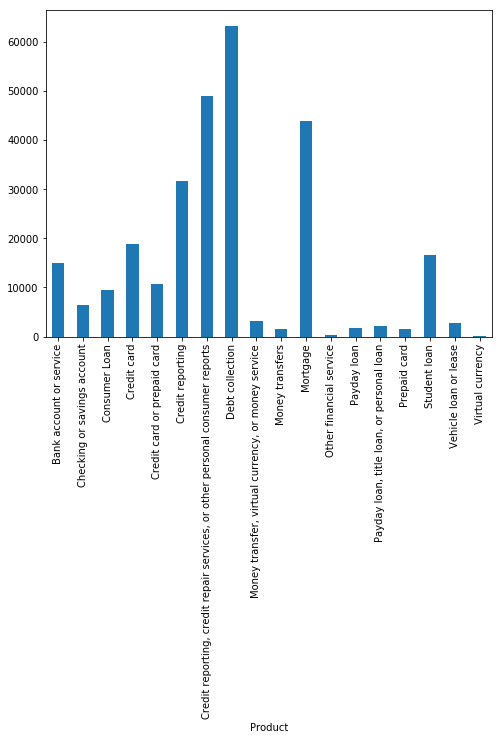

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product')['Consumer Complaint'].count().plot.bar(ylim=0)
plt.show()

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

* sublinear_df is set to True to use a logarithmic form for frequency.
* min_df is the minimum numbers of documents a word must be present in to be kept.
* norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
* ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
* stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

##### Term Frequency Inverse Document Frequency (tf-idf)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [16]:
df['Consumer Complaint'].to_numpy()

array(['I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements',
       "I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter th

In [17]:
features = tfidf.fit_transform(df['Consumer Complaint'].to_numpy())

In [18]:
features

<277814x559018 sparse matrix of type '<class 'numpy.float64'>'
	with 31564642 stored elements in Compressed Sparse Row format>

In [19]:
labels = df.category_id

In [20]:
labels.shape

(277814,)

In [21]:
df.columns

Index(['Product', 'Consumer Complaint', 'category_id'], dtype='object')

In [22]:
features.shape

(277814, 559018)

- We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products:

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [23]:
# >>> x = np.array([3, 1, 2])
# >>> np.argsort(x)
# array([1, 2, 0])
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  - Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  - Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  - Most correlated unigrams:
. bank
. overdraft
  - Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  - Most correlated unigrams:
. overdraft
. deposit
  - Most correlated bigrams:
. overdraft fees
. checking account
# 'Consumer Loan':
  - Most correlated unigrams:
. car
. vehicle
  - Most correlated bigrams:
. car loan
. auto loan
# 'Credit card':
  - Most correlated unigrams:
. macy
. card
  - Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  - Most correlated unigrams:
. express
. card
  - Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  - Most correlated unigrams:
. equifax
. experian
  - Most correlated bigrams:
. verify accounts
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  - Most correlated unigrams:
. inquiries
. equifax
  - Most correlated bigrams:
. report understanding
. m

Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Consumer Complaint'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [ ]:
df[df['Consumer Complaint'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer Complaint,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


Model Selection
* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
cv_df

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()